# QPSK test
- https://mriquestions.com/uploads/3/4/5/7/34572113/quad_signals_tutorial-lyons.pdf
- https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-demodulation/understanding-quadrature-demodulation/
- https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-demodulation/quadrature-frequency-and-phase-demodulation/
- https://en.wikipedia.org/wiki/In-phase_and_quadrature_components

In [1]:
import os, sys

def gen_relative_path(target_path): 
    
    def del_same_parents(target_path, current_path):
        if len(target_path) * len(current_path) > 0:
            if target_path[0] == current_path[0]:
                target_path.pop(0)
                current_path.pop(0)
                del_same_parents(target_path, current_path)
            
    current_path = os.getcwd().replace('\\', '/').split('/')
    target_path = target_path.replace('\\', '/').split('/')
    del_same_parents(target_path, current_path)
    
    return ['..'] * len(current_path) + target_path


def append_source_relative_path(source_relative_path):
    sys.path.append(os.sep.join(source_relative_path))

In [2]:
# paths = ['']
# paths = [gen_relative_path(p) for p in paths]
# print(paths)

In [3]:
paths = [['..', '..', '..', '..', '..', 'Waves', 'bitbucket', 'github', 'codes'],
         ['..', 'codes']]

for path in paths:
    append_source_relative_path(path)

In [4]:
%pylab inline

from waves.sound import *
from waves.tools.dsp.mixers.frequency_mixers import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
import warnings 

warnings.filterwarnings('ignore')

In [6]:
def show_pair(sig_left, sig_right, frames = 300):
    sig_left.show(color = 'red', show_frames = slice(0, frames))
    sig_right.show(color = 'green', show_frames = slice(0, frames))

## LO

In [7]:
phase_shift = PI2 / 8

In [8]:
freq_lo = int(100e3)

freq_sampling = freq_lo * 8 * 2

In [9]:
duration_seconds = 1
t = np.linspace(0, duration_seconds, duration_seconds * freq_sampling)

## IF

In [10]:
freq_if = 1000

### QPSK

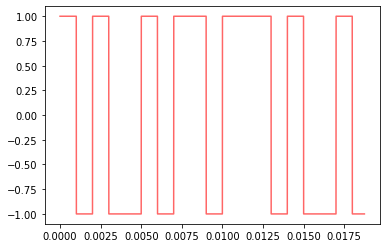

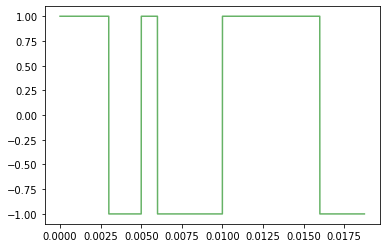

In [11]:
freq_if = 1000

def gen_bitstream(freq, ts):
    bs = np.zeros(ts.shape)
    bs[:] = 1
    n = ts.shape[-1]
    for i in range(1, n):
        if int(freq * ts[i ] ) > int(freq * ts[i -1] ) :
            bs[i] = random.choice((-1, 1))
        else :
            bs[i] = bs[i-1]
    return bs


I = Channel(gen_bitstream(freq_if, t), ts = t, framerate = freq_sampling)
Q = Channel(gen_bitstream(freq_if, t), ts = t, framerate = freq_sampling)
# IQ = Channel(I.ys + Q.ys, ts = t, framerate = freq_sampling) 

I.show(color = 'red', show_frames = slice(0, 30000))
plt.figure()
Q.show(color = 'green', show_frames = slice(0, 30000))

## Modulation

In [12]:
qm = QuadratureMixer(freq = freq_lo)

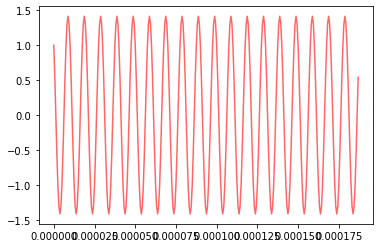

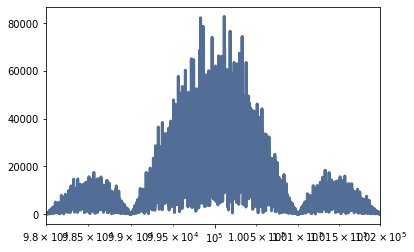

In [13]:
RF_I, RF_Q, RF = qm.modulate(I, Q)

RF.show(color = 'red', show_frames = slice(0, 300))
plt.figure()
RF.make_spectrum().plot(freq_lims = (freq_lo - freq_if * 2 , freq_lo + freq_if * 2))

## De-modulation

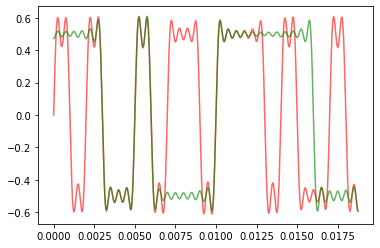

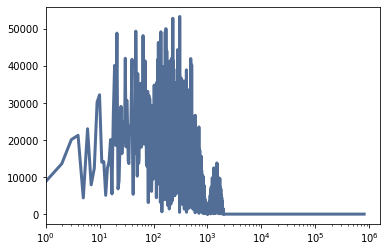

In [25]:
I_reconstructed, Q_reconstructed, _ = qm.demodulate(RF, low_pass_cutoff = freq_if * 2) 
# I_reconstructed, Q_reconstructed, _ = qm.demodulate(RF, low_pass_cutoff = freq_lo) 
# I_reconstructed, Q_reconstructed, _ = qm.demodulate(RF, low_pass_cutoff = freq_lo) 

show_pair(I_reconstructed, Q_reconstructed, 30000)
plt.figure()
I_reconstructed.make_spectrum().plot(freq_lims = (1, freq_sampling))

## Validate

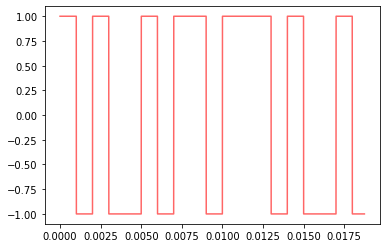

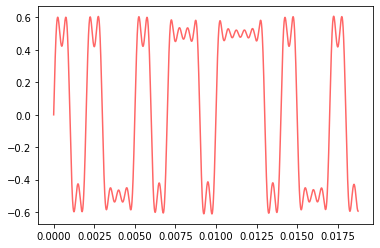

In [26]:
I.show(color = 'red', show_frames = slice(0, 30000))
plt.figure()
I_reconstructed.show(color = 'red', show_frames = slice(0, 30000))

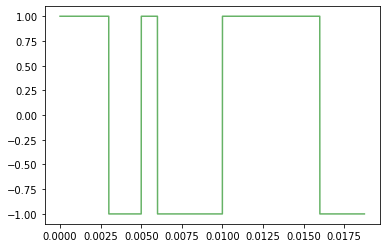

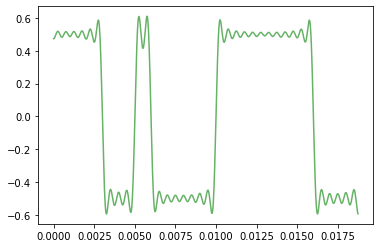

In [27]:
Q.show(color = 'green', show_frames = slice(0, 30000))
plt.figure()
Q_reconstructed.show(color = 'green', show_frames = slice(0, 30000))